<br><br>
<p style="font-size:24px; color:#216594;text-align:center;">
Applied AI in Chemical and Process Engineering
</p>

<p style="font-size:30px; color:black;text-align:center;">
    Bulding ML pipeline for Reactor data
</p>


███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████
<br>


**Week 3-4**

This notebook will build a pipeline to prepare data and develop an ML algorithm


# Content

**Part 1: Data Preprocessing & Exploration**

| Step                  | Description                                                                 | Key Actions & Tools                                                                                     |
|-----------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Data Preparation**  | Gather, load, and inspect raw data                                          | - Load dataset (e.g., CSV, DB)<br>- Check data types, shape, initial samples (`df.head()`, `df.info()`) |
| **Data Cleaning**     | Fix issues in data quality                                                  | - Handle missing values (impute or drop)<br>- Remove duplicates<br>- Detect and treat outliers (IQR, Z-score) |
| **Exploratory Data Analysis (EDA)** | Understand data distributions and relationships                   | - Visualizations: histograms, scatter plots, pair plots<br>- Correlation matrix (heatmaps)<br>- Summary statistics |

**Part 2: Modeling & Interpretation**

| Step                                  | Description                                                                 | Key Actions & Tools                                                                                     |
|---------------------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| **Normalization (Principle Only)**    | Scale features to same range (e.g., for distance-based models)              | - Apply Min-Max Scaling or Standardization<br>- Justify choice based on model needs (e.g., SVM, KNN, Neural Networks) |
| **Model Training, Validation & Testing** | Build and evaluate model performance                                    | - Split data: `train_test_split`<br>- Train models (e.g., Linear Regression, Random Forest, XGBoost)<br>- Use cross-validation<br>- Evaluate using metrics (RMSE, MAE, R², etc.) |
| **Model Explanation with XAI**        | Interpret model predictions and feature importance                          | - Use SHAP, LIME, or feature importance plots<br>- Explain predictions to stakeholders<br>- Ensure transparency and trust |

**Note:** Since our example does not have categorical data, we do not encode variables - which is essential if the data is categorical 

# Ethanol Production - Sugar Industry

![Process Flow Diagram](./assets/etoh_flowdiagram.png)


**Our goal is to model residual sugar. The model can be later used to optimize the fermentation process**

**Data**
- Temperature °C: Fermentation tank
- pH: Fermentation tank
- Yeast Concentration g/L: Fermentation tank
- Sugar Concentration w/v: Dilution tank (input for fermenation)
- Residual Sugar g/L: Post-fermentation


Note: The data is simualted data


# Data Preperation

**Prompt:**
Load data from below github
https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Ethanol_Molasses_Dataset.csv


**Prompt:**

Print first 15 rows of the table and the dimensions of the table

# Data Cleaning

| Step           | Purpose                                      | Common Methods                                                                 | Notes                                                                 |
|----------------|----------------------------------------------|---------------------------------------------------------------------------------|-----------------------------------------------------------------------|
| **Missing Data** | Handle incomplete or null values             | - Remove rows/columns<br>- Impute with mean/median/mode<br>- KNN/imputation models | Can bias models; choice depends on amount and reason for missingness |
| **Duplicates**   | Remove redundant data entries                | - Identify and drop duplicate rows<br>- Use `pandas.drop_duplicates()`           | Prevents overfitting and skewed results                              |
| **Outliers**     | Detect and manage extreme values             | - Z-score, IQR method<br>- Visualization (box plots, scatter plots)<br>- Winsorizing | Can distort models; keep if meaningful (e.g., fraud detection)       |

## Check for missing data

**Prompt:**
Check if the table has missing values

## Fill the missing data wiht median using imputer

**Prompt:**
Fill the missing data with median value

## Check for duplicates

**Prompt:**

Check if it has duplicates

# Exploratory Dara Analysis (EDA)

## Summary Stats

**Prompt:**

## Data Visualization

### Data Visualization with Box Plot


![Box plot](./assets/boxplot.png)


**Prompt:**

Create box plots for all variables in multiple plots in single figure. show outliers

### Data Visualization with Violine plot


![Violin plot](./assets/violinplot.png)


**Prompt:**

Create violine plots for all variables in multiple plots in single figure.

### Data Visualization with Histogram plot

**Prompt:**

Create histogram plots for all variables in multiple plots in single figure.

## Outliers

**Strategy:** We will use statistical methods to remove outliers (IQR)

**Prompt:**

Remove all outliers of df using IQR method and create a table called dfclean

### Histogram plot with cleaned data

**Prompt:**

Create histogram plots for all variables in multiple plots in single figure using dfclean

## Corelinearity

**Prompt:** 

Print correlations matrix and do a plot a heatmap of correlation of dfclean

# Data Prep for Model

## Define Features and Target

**Prompt:**

'Residual_Sugar' is Y variables and Temperature','pH','Yeast_Concentration','Sugar_Concentration' are features. Plot scatter plot between features and Y

## Feature Engineering with Data Scaling

**Prompt:**

Normalize X data using StandarScaler and plot histogram

# Model Selection


![Model guide](./assets/model_selection.png)

# XGBoost Model


**Note:** 

Since this is tree model which does not require feature scaling in general, we **will not** use scaled data for model fitting


<p style="font-size:25px; color:blue;text-align:left;">
    XGBoost
</p>



    🔘 XGBoost is a machine learning algorithm that builds multiple decision trees one after another, where each new tree tries to fix the errors made by the previous trees.

    🔘 It uses a method called gradient boosting, which helps improve prediction accuracy by combining many weak models into a stronger one.
    
    🔘The algorithm includes features to prevent overfitting, such as regularization and controlling how the trees grow.

    🔘 XGBoost can handle large datasets efficiently by using parallel processing to speed up training.

    🔘 It is widely used because it is fast, accurate, and works well for tasks like classification and regression, making it popular among beginners and experts alike.

![xgboost](./assets/xgboost.png)

References:

[XGboost paper](https://arxiv.org/abs/1603.02754)

## Data Split

![data split](./assets/datasplit.jpg)

**Prompt**

Split the data into training and testing sets.

## Hyperparameter Optimization
| Parameter             | Purpose                              | Simple Explanation | Default |
|-----------------------|--------------------------------------|--------------------|---------|
| `n_estimators`        | Number of decision trees             | More trees = more learning, but too many can overdo it. Like having more experts vote on the answer. <br> ✅ **Typical tuned range:** 100–300 | `100` |
| `max_depth`           | How deep each tree can go            | Controls complexity. Deeper = more detailed rules, but may memorize data. Like allowing more "if-then" steps. <br> ✅ **Typical tuned range:** 3–10 | `6` |
| `learning_rate`       | How fast the model learns            | Smaller = slow, steady improvement. Larger = fast but may overshoot. Like step size toward the goal. <br> ✅ **Typical tuned range:** 0.01 – 0.3 | `0.3` |
| `subsample`           | % of data used for each tree         | Uses only part of the data per tree to avoid overfitting. Like asking different small groups to learn. <br> ✅ **Typical tuned range:** 0.6 – 1.0 | `1.0` |
| `colsample_bytree`    | % of features used per tree          | Each tree uses only some columns (e.g., size, age, location). Prevents over-reliance on one feature. <br> ✅ **Typical tuned range:** 0.6 – 1.0 | `1.0` |
| `min_child_weight`    | Minimum data in a prediction box     | Stops trees from splitting too small. “Don’t make a rule unless at least a few examples agree.” <br> ✅ **Typical tuned range:** 1 – 7 | `1` |
| `gamma`               | Minimum improvement to split         | Only split if it clearly helps. Like saying: “Only add a rule if it makes things meaningfully better.” <br> ✅ **Typical tuned range:** 0 – 0.5 | `0` |
| `reg_alpha`           | Simplifies model (L1 penalty)        | Shrinks weak signals to zero. Helps when many inputs are noisy or irrelevant. <br> ✅ **Typical tuned range:** 0 – 1 | `0` |
| `reg_lambda`          | Smooths predictions (L2 penalty)     | Keeps predictions stable by avoiding extreme values. Works like a safety brake. <br> ✅ **Typical tuned range:** 1 – 2 | `1` |

### Grid Search

🔘 Grid Search is like trying all possible combinations of settings to find the best one — just like testing different oven temperatures and baking times to make the perfect cake. 

🔘 It automatically tests every combination of hyperparameters (like learning_rate=0.1, max_depth=6) you specify, trains the model each time, and picks the one with the best performance. 

🔘 It uses cross-validation (e.g., 5-fold) to ensure the result is reliable and not just lucky on one data split. 

🔘 Think of it as "brute-force tuning" — thorough, systematic, and great for finding optimal settings, but can be slow with too many parameters. 

*Example: If you test 5 values for max_depth, and 5 values for n_estimators, Grid Search will try all 5x5=25 combinations and tell you which works best.* 
     


![grid](./assets/grid_search.png)

## K-fold Cross validation

In K-fold cross-validation, the data is split into K equal parts (folds). The model is trained K times, each time leaving out one fold for testing and using the other K-1 folds for training. The final performance metric is averaged over all K runs. This approach uses the entire dataset for both training and testing, providing a more reliable estimate of model performance.


**Prompt:**

Finetune below hyperparamters of xgboost with 5 fold cross validation. Print R2/RMSE of testing and training

```
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

```

## Training

# Model Evaluation

**Prompt:**
Evaluate the model as below.
1. Plot actual vs predicted values for both train and test
2. Print R2/RMSE on the graph
3. Plot residual for both training and testing


## Residual Plot

![residual](./assets/residualplot.png)


## Save final model

**Prompt:** 

Save the model in pickle format

In [44]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

# Model Explanation with XAI

<Figure size 1000x600 with 0 Axes>

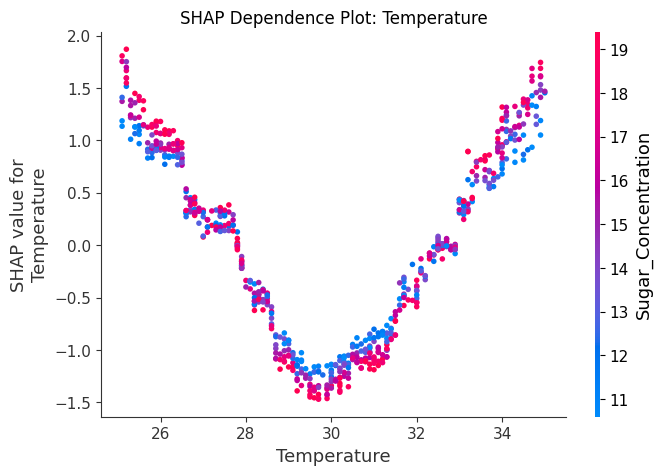

<Figure size 1000x600 with 0 Axes>

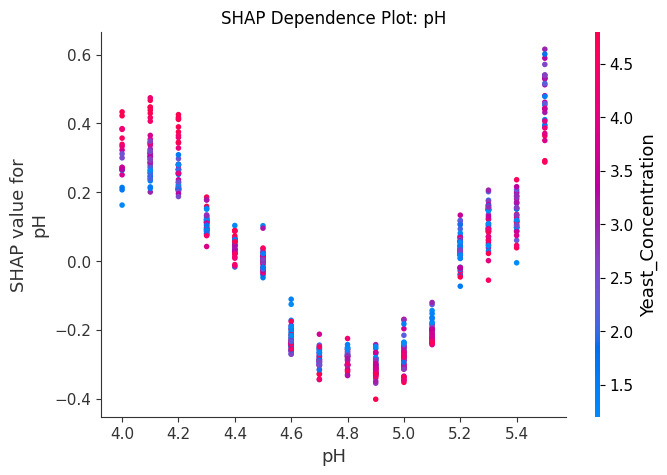

<Figure size 1000x600 with 0 Axes>

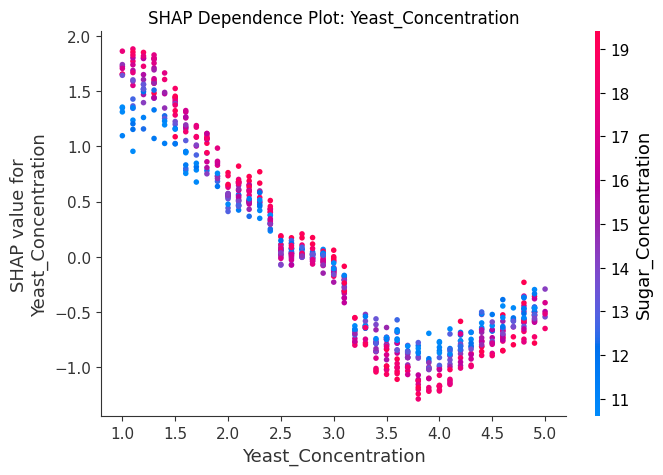

<Figure size 1000x600 with 0 Axes>

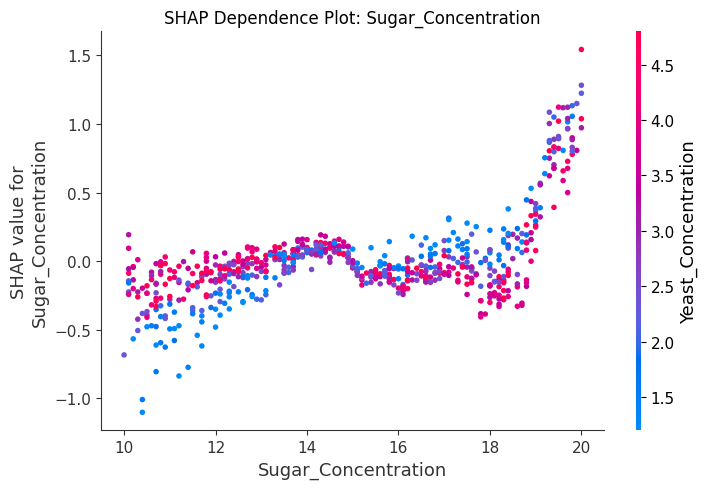

In [25]:

# Dependency plots for each feature
features = ['Temperature', 'pH', 'Yeast_Concentration', 'Sugar_Concentration']

for i, feature in enumerate(features):
    plt.figure(figsize=(10,6))
    shap.dependence_plot(feature, shap_values, X_train, feature_names=features, show=False)
    plt.title(f'SHAP Dependence Plot: {feature}')
plt.tight_layout()
plt.show()